In [1]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [16]:
cases = pd.read_csv('States Reporting Cases of COVID-19 to CDC_.csv', na_values = 'None')
cases.head()

,Jurisdiction,Range,Cases Reported,Community Transmission,URL
0,Alabama,5001 to 10000,5668.0,"Yes, defined area(s)",http://www.adph.org/
1,Alaska,101 to 1000,329.0,"Yes, defined area(s)",http://dhss.alaska.gov/Pages/default.aspx
2,American Samoa,NaN,NaN,NaN,http://dhss.as/
3,Arizona,5001 to 10000,5251.0,"Yes, widespread",http://www.azdhs.gov/
4,Arkansas,1001 to 5000,2262.0,"Yes, widespread",https://www.healthy.arkansas.gov/


In [3]:
states = geopandas.read_file('tl_2017_us_state.shp')
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


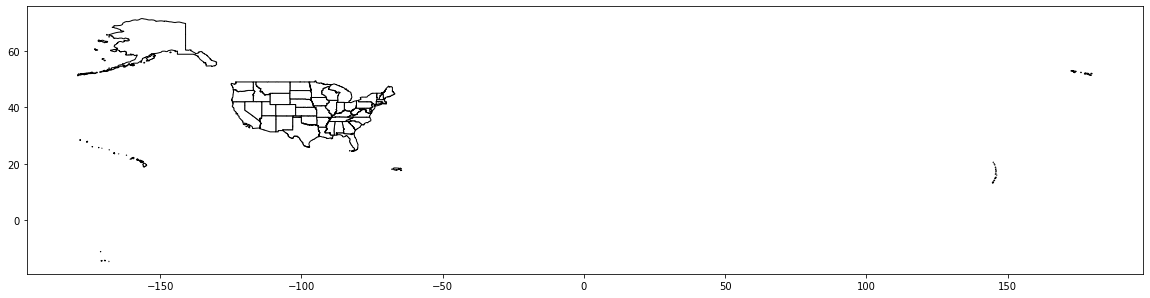

In [4]:
fig, gax = plt.subplots(figsize=(20, 20))

states.plot(ax=gax, edgecolor='black',color='white')

plt.show()

In [26]:
data = states.merge(cases, left_on='NAME', right_on='Jurisdiction')

In [27]:
data.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Jurisdiction,Range,Cases Reported,Community Transmission,URL
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096...",West Virginia,101 to 1000,914.0,"Yes, defined area(s)",http://www.dhhr.wv.gov/bph/Pages/default.aspx
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"MULTIPOLYGON (((-82.98748 24.62538, -82.98748 ...",Florida,10001 or more,27127.0,"Yes, widespread",http://www.floridahealth.gov/
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",Illinois,10001 or more,33059.0,"Yes, widespread",http://www.idph.state.il.us/
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",Minnesota,1001 to 5000,2721.0,"Yes, widespread",http://www.health.state.mn.us/
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220...",Maryland,10001 or more,14775.0,"Yes, widespread",http://dhmh.maryland.gov/Pages/Index.aspx


In [7]:
data['Cases Reported'] = data['Cases Reported'].astype('float')

In [28]:
print(type(data))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [15]:
data.to_csv('1.csv')

In [39]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


E:\Anaconda\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(-197.18562434999998, 197.81421935, -18.90389295, 75.74186595)

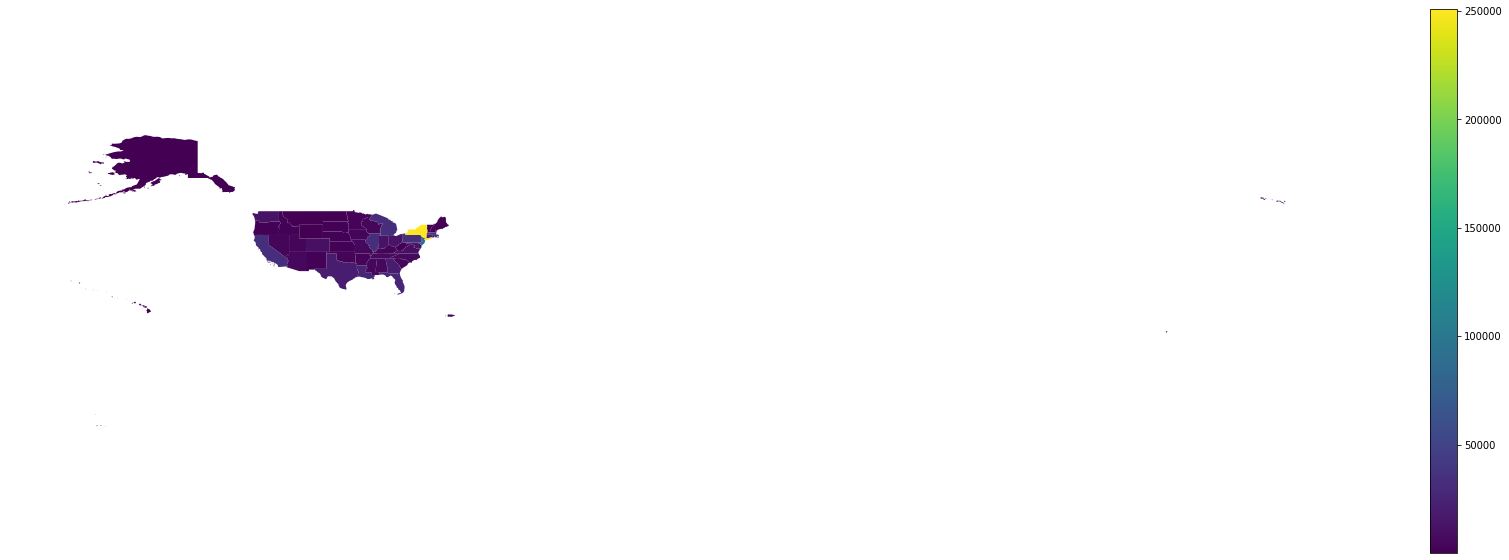

In [38]:
fig, ax = plt.subplots(figsize=(30,10))
data.plot(column='Cases Reported', ax=ax,legend=True)
plt.axis('off')